In [1]:
import pandas as pd

# Load datasets
data_df = pd.read_csv('/kaggle/input/the-global-jukebox/data (1).csv')
societies_df = pd.read_csv('/kaggle/input/the-global-jukebox/societies.csv')
songs_df = pd.read_csv('/kaggle/input/the-global-jukebox/songs.csv')

# Display the shape of each dataset
print("Data shape:", data_df.shape)
print("Societies shape:", societies_df.shape)
print("Songs shape:", songs_df.shape)


Data shape: (5776, 40)
Societies shape: (1273, 78)
Songs shape: (6038, 29)


**What is the distribution of societies across different regions?**

In [2]:
import plotly.express as px

# Assuming you have loaded the dataset into a variable named 'societies_df'
fig = px.histogram(societies_df, x="Region", title="Distribution of Societies across Regions")
fig.show()


**How are societies distributed geographically?**

In [3]:
fig = px.scatter_geo(societies_df, lat="Society_latitude", lon="Society_longitude", color="Region",
                     title="Geographical Distribution of Societies")
fig.show()


**What is the distribution of societies based on the Koppen climate?**

In [4]:
fig = px.sunburst(societies_df, path=["Koppen_code", "Region"], title="Distribution of Societies by Koppen Climate")
fig.show()


**What is the distribution of song genres?**

In [5]:
# Assuming you have loaded the dataset into a variable named 'songs_df'
fig = px.histogram(songs_df, x="Genre", title="Distribution of Song Genres", height=1000)
fig.show()


**How does the distribution of song durations look like?**

In [6]:
fig = px.histogram(songs_df, x="Duration", title="Distribution of Song Durations")
fig.show()


**What is the distribution of song societies?**

In [7]:
fig = px.histogram(data_df, x="society_id", title="Distribution of Song Societies")
fig.show()


**What is the distribution of societies across different divisions?**

In [8]:
fig = px.histogram(societies_df, x="Division", title="Distribution of Societies across Divisions")
fig.show()


**How many societies are there in each subregion?**

In [9]:
societies_count_per_subregion = societies_df.groupby("Subregion")["society_id"].count().reset_index()
fig = px.bar(societies_count_per_subregion, x="Subregion", y="society_id", title="Number of Societies in Each Subregion")
fig.show()


**What is the distribution of societies based on their language families?**

In [10]:
fig = px.sunburst(societies_df, path=["FamilyLevGlottocode", "Region"], title="Distribution of Societies by Language Families")
fig.show()


**How does the distribution of song years look like?**

In [11]:
# Assuming you have loaded the dataset into a variable named 'songs_df'
fig = px.histogram(songs_df, x="Year", title="Distribution of Song Years")
fig.show()


**How many songs were recorded per year?**

In [12]:
songs_recorded_per_year = songs_df.groupby("Year")["song_id"].count().reset_index()
fig = px.bar(songs_recorded_per_year, x="Year", y="song_id", title="Number of Songs Recorded per Year")
fig.show()


**How does the distribution of song durations vary across different language families?**

In [13]:
# Assuming you have loaded the datasets into variables named 'songs_df' and 'societies_df'
merged_df = pd.merge(songs_df, societies_df, on="society_id")
fig = px.box(merged_df, x="FamilyLevGlottocode", y="Duration", title="Distribution of Song Durations Across Language Families")
fig.show()


**How does the distribution of song genres vary based on the society's homeland latitude?**

In [14]:
# Assuming you have loaded the datasets into variables named 'songs_df' and 'societies_df'
merged_df = pd.merge(songs_df, societies_df, on="society_id")
fig = px.histogram(merged_df, x="Genre", color="Homeland_latitude", title="Distribution of Song Genres Across Homeland Latitudes", height=1000)
fig.show()


**Are there any correlations between the number of lines in songs and the longitude of a society's area?**

In [15]:
# Assuming you have loaded the datasets into variables named 'data_df' and 'societies_df'
merged_df = pd.merge(data_df, societies_df, on="society_id")

# Calculate total lines per song
merged_df["total_lines"] = merged_df.iloc[:, 3:].count(axis=1)

# Create a scatter plot
fig = px.scatter(merged_df, x="Area_longitude", y="total_lines", title="Correlation between Area Longitude and Number of Lines in Songs")
fig.show()



**How does the distribution of song durations vary across different climate regions?**

In [16]:
# Assuming you have loaded the datasets into variables named 'songs_df' and 'societies_df'
merged_df = pd.merge(songs_df, societies_df, on="society_id")
fig = px.histogram(merged_df, x="Duration", color="Koppen_code", title="Distribution of Song Durations Across Climate Regions")
fig.show()


**What is the distribution of societies based on their language family and region?**

In [17]:
# Assuming you have loaded the dataset into a variable named 'societies_df'
fig = px.sunburst(societies_df, path=["FamilyLevGlottocode", "Region"], title="Distribution of Societies by Language Family and Region")
fig.show()


**What is the relationship between the longitude of a society's area, the number of lines in songs, and the Koppen climate?**

In [18]:
# Assuming you have loaded the datasets into variables named 'data_df' and 'societies_df'
merged_df = pd.merge(data_df, societies_df, on="society_id")

# Calculate total lines per song
merged_df["total_lines"] = merged_df.iloc[:, 3:].count(axis=1)

# Create a scatter plot
fig = px.scatter(merged_df, x="Area_longitude", y="total_lines", title="Correlation between Area Longitude and Number of Lines in Songs")
fig.show()


**How does the relationship between the number of lines in songs and the latitude of societies' homeland vary across different Koppen climate regions?**

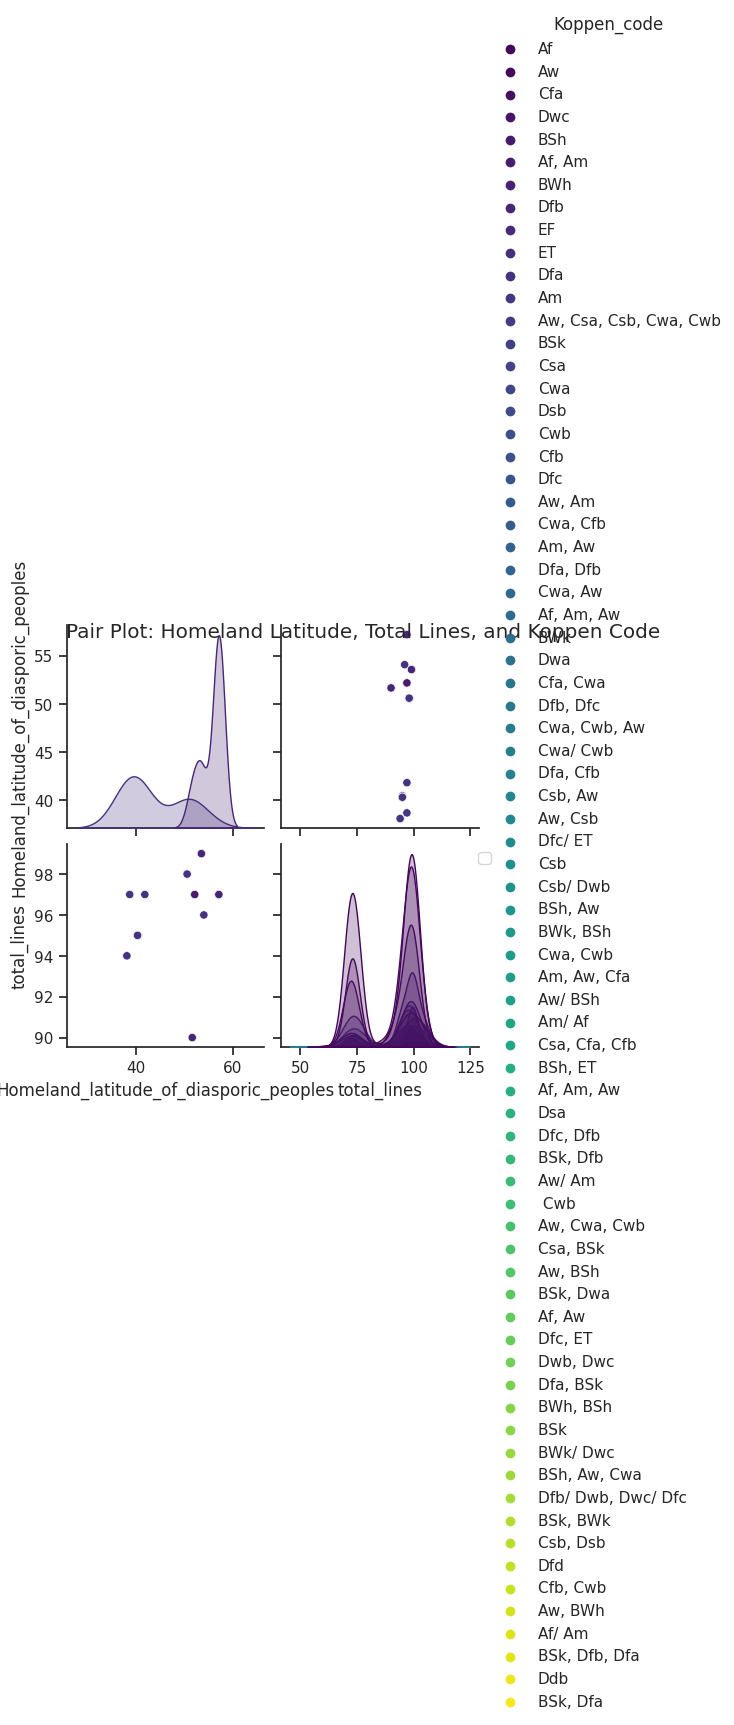

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Merge the datasets
merged_df = pd.merge(data_df, societies_df, on="society_id")

# Calculate total lines per song
merged_df["total_lines"] = merged_df.iloc[:, 3:].count(axis=1)

# Select relevant columns for the pair plot
pair_plot_data = merged_df[['Homeland_latitude_of_diasporic_peoples', 'total_lines', 'Koppen_code']]

# Create pair plots with a broader palette
sns.set(style="ticks")
sns.pairplot(pair_plot_data, hue="Koppen_code", palette="viridis", diag_kind="kde")

# Show the plot
plt.suptitle("Pair Plot: Homeland Latitude, Total Lines, and Koppen Code")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()
